# アンサンブル学習でBitcoinの価格を予測する
## 〜とりあえず実装してみた編〜

# 前回
## 独立の情報源からBitcoinの価格を推定するプログラムを大量に作れば、文殊の知恵効果でハチャメチャな精度が出るのでは！？
![](./img/idea.png)

# とりあえずBTCのデータを見る

bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv

[Bitcoin Historical Data | Kaggle](https://www.kaggle.com/mczielinski/bitcoin-historical-data)

In [1]:
import pandas as pd
df = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
from datetime import datetime
df["Timestamp_UTC"] = df["Timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
df = df.set_index("Timestamp_UTC")

In [3]:
df = df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume_(BTC)": "volume"
})

In [4]:
import cufflinks as cf
cf.set_config_file(offline=True)
red = cf.get_scales("dflt")[4]
green = cf.get_scales("dflt")[2]

# BTC_USDローソクチャート分足

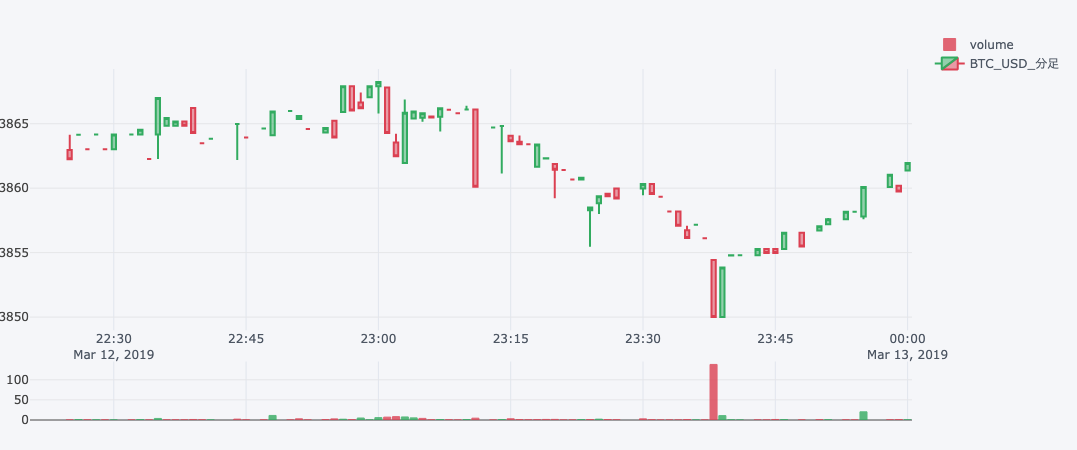

In [5]:
qf = cf.QuantFig(df.tail(100)) # 表示に時間がかかるので最後100分だけ表示
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_分足")

In [6]:
# １分毎は多すぎるので１日毎にする
how = {
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
}
df_day = df.resample('D').agg(how)
df_day.head()

,open,high,low,close,volume
Timestamp_UTC,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878
2012-01-01,4.58,5.00,4.58,5.00,21.602000
2012-01-02,5.00,5.00,5.00,5.00,19.048000
2012-01-03,5.32,5.32,5.14,5.29,88.037281
2012-01-04,4.93,5.57,4.93,5.57,107.233260


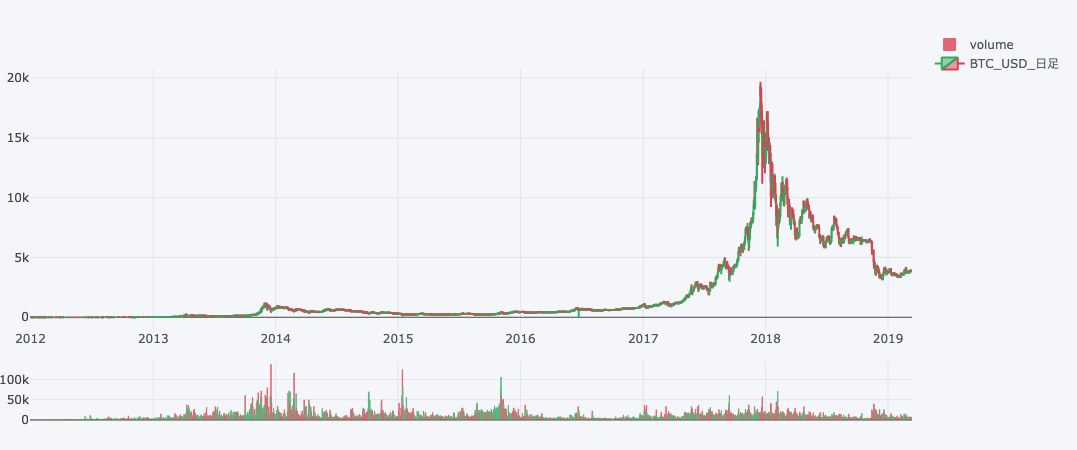

In [7]:
# BTC_USDローソクチャート日足
qf = cf.QuantFig(df_day)
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_日足")

# BTCの価格に関係ありそうな要素
## １．日経平均株価

[Nikkei 225 (^N225) Stock Historical Prices & Data](https://finance.yahoo.com/quote/%5EN225/history?ltr=1)

In [8]:
n255 = pd.read_csv("./data/N225.csv")
n255["Timestamp_UTC"] = n255["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
n255 = n255.set_index("Timestamp_UTC").drop(columns=["Date", "Adj Close"])
n255 = n255.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"
})
n255.head()

,open,high,low,close,volume
Timestamp_UTC,,,,,
2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,106000.0
2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,77700.0
2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,101300.0
2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,112300.0
2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,106200.0


# 日経平均株価ローソクチャート

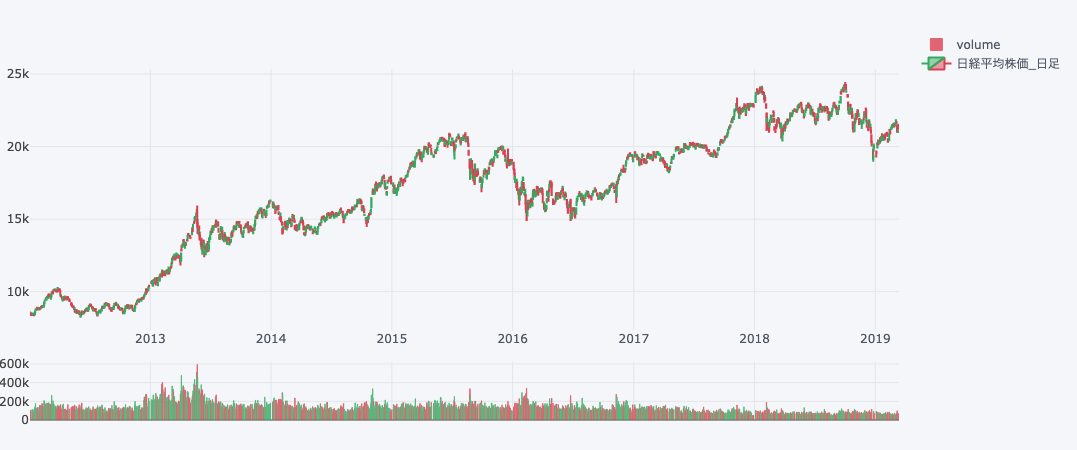

In [9]:
qf = cf.QuantFig(n255)
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="日経平均株価_日足")

# BTCデータと日経平均データの形を同じにする

In [10]:
n255_btc = pd.merge(n255, df_day, on="Timestamp_UTC", how="inner", suffixes=("_n255", "_btc"))
n255_btc = n255_btc.dropna()
n255_btc.head()

,open_n255,high_n255,low_n255,close_n255,volume_n255,open_btc,high_btc,low_btc,close_btc,volume_btc
Timestamp_UTC,,,,,,,,,,
2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,106000.0,4.93,5.57,4.93,5.57,107.233260
2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,77700.0,5.72,6.65,5.72,6.65,94.801829
2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,101300.0,6.65,6.90,6.00,6.00,33.882747
2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,112300.0,6.24,7.14,6.24,7.14,62.289980
2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,106200.0,7.14,7.33,6.25,7.00,105.358934


# BTC_USDと日経平均株価を重ねてみる

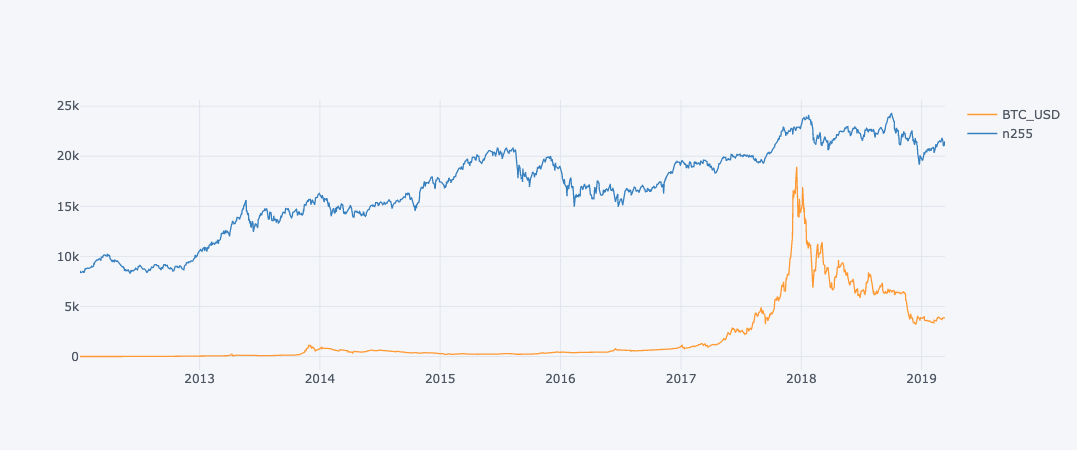

In [11]:
pd.DataFrame({
    "BTC_USD": n255_btc["close_btc"],
    "n255": n255_btc["close_n255"],
}).iplot()

# BTC_USDと日経平均株価の相関

In [12]:
import matplotlib.pyplot as plt
X = n255_btc["close_n255"].to_frame()
Y = n255_btc["close_btc"].to_frame()
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.grid()

# 線形回帰する

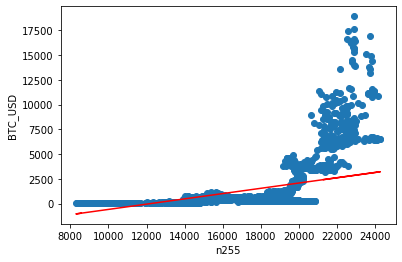

In [13]:
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-04 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.plot(X, model.predict(X), color="red")

# 実際のBTC_USDと予測結果（2018-01-04から2019-03-13まで）

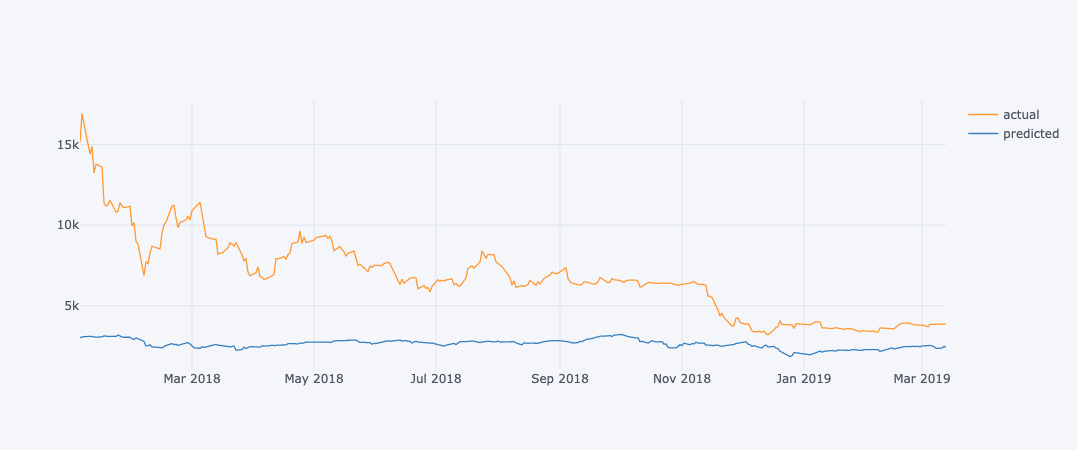

In [14]:
pd.DataFrame({
    "actual": test_y["close_btc"],
    "predicted": model.predict(test_x).reshape(1, -1)[0]
}).iplot()

# 結果が芳しくないので、対数差分（≒変化率）を回帰してみる

In [38]:
import numpy as np
difflog_n255_btc = np.log(n255_btc) - np.log(n255_btc.shift())
difflog_n255_btc = difflog_n255_btc.dropna()
difflog_n255_btc.head()

/Users/chinomirai/.local/share/virtualenvs/ensemble-ncYZH6ku/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



,open_n255,high_n255,low_n255,close_n255,volume_n255,open_btc,high_btc,low_btc,close_btc,volume_btc
Timestamp_UTC,,,,,,,,,,
2012-01-05,-0.003971,-0.007285,-0.007736,-0.008376,-0.310584,0.148630,0.177222,0.148630,0.177222,-0.123218
2012-01-06,-0.003138,-0.003549,-0.015745,-0.011655,0.265231,0.150648,0.036905,0.047791,-0.102857,-1.028883
2012-01-10,-0.007804,-0.004533,0.006667,0.003796,0.103087,-0.063637,0.034191,0.039221,0.173953,0.608895
2012-01-11,0.002131,0.001553,0.002478,0.003037,-0.055850,0.134733,0.026263,0.001601,-0.019803,0.525572
2012-01-12,-0.002118,-0.004368,-0.007828,-0.007401,-0.225029,-0.026971,0.006798,0.040758,-0.072571,-0.246982


# BTC_USDの変化率と日経平均株価の変化率を重ねる

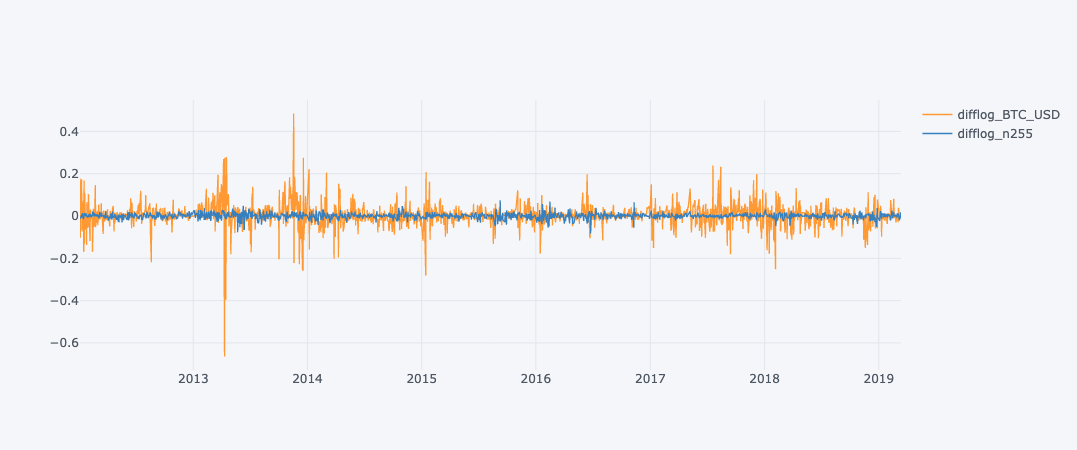

In [39]:
pd.DataFrame({
    "difflog_BTC_USD": difflog_n255_btc["close_btc"],
    "difflog_n255": difflog_n255_btc["close_n255"],
}).iplot()

# BTC_USDの変化率と日経平均株価の変化率の相関

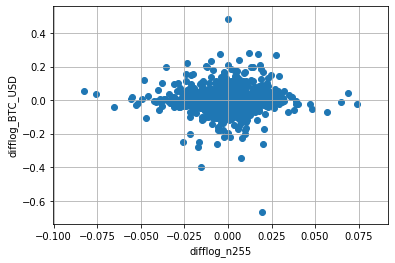

In [40]:
import matplotlib.pyplot as plt
X = difflog_n255_btc["close_n255"].to_frame()
Y = difflog_n255_btc["close_btc"].to_frame()
plt.scatter(X, Y)
plt.xlabel("difflog_n255")
plt.ylabel("difflog_BTC_USD")
plt.grid()

# 一応回帰する

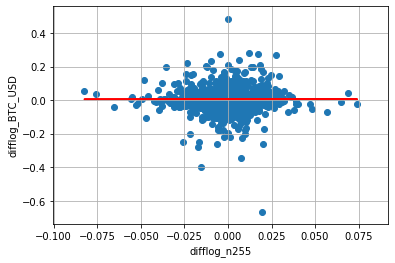

In [41]:
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-04 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-04", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)
plt.scatter(X, Y)
plt.xlabel("difflog_n255")
plt.ylabel("difflog_BTC_USD")
plt.plot(X, model.predict(X), color="red")
plt.grid()

# 実際のBTC_USDの変化率と予測結果（2018-01-04から2019-03-13まで）

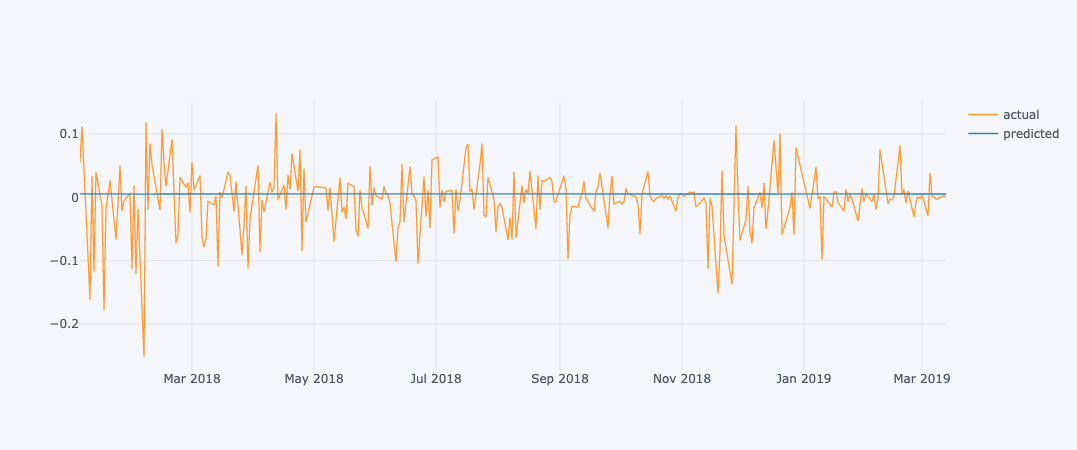

In [42]:
pd.DataFrame({
    "actual": test_y["close_btc"],
    "predicted": model.predict(test_x).reshape(1, -1)[0]
}).iplot()

# 実際のBTC_USDと予測結果（2018-01-04から2019-03-13まで）

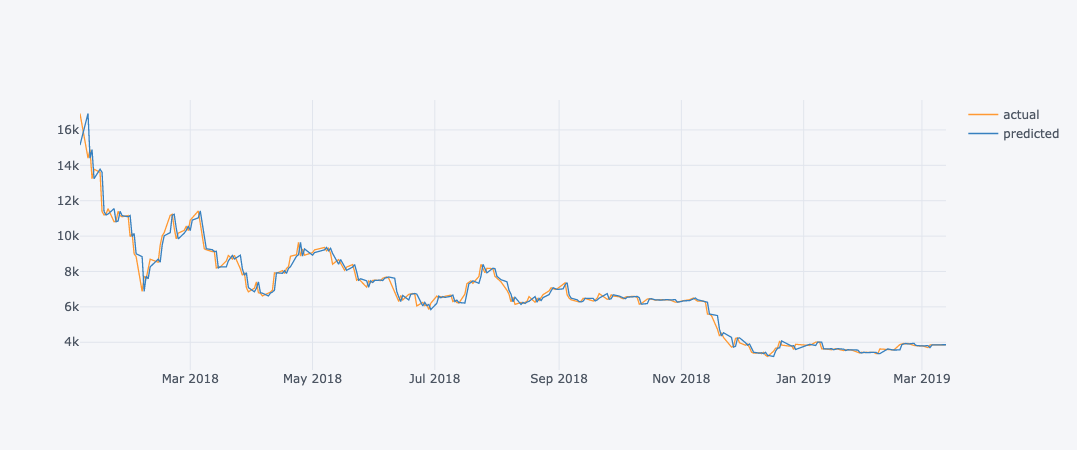

In [44]:
import math
predict = n255_btc["close_btc"].to_frame()[split_time <= n255_btc.index]
predict["shift"] = predict.shift()
predict["pred_difflog"] = model.predict(test_x).reshape(1, -1)[0]
predict = predict.dropna()
predict["pred_diff"] = math.e**predict["pred_difflog"]
predict["predicted"] = predict["shift"] + predict["pred_diff"]
pd.DataFrame({
    "actual": predict["close_btc"],
    "predicted": predict["predicted"]
}).iplot()

後追いモデルになってる

# おまけ：悔しいのでLightGBMでやってみる

[1]	valid_0's l2: 3.14199e+07
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 2.48395e+07
[3]	valid_0's l2: 1.9849e+07
[4]	valid_0's l2: 1.61132e+07
[5]	valid_0's l2: 1.27554e+07
[6]	valid_0's l2: 1.08046e+07
[7]	valid_0's l2: 9.16798e+06
[8]	valid_0's l2: 8.07986e+06
[9]	valid_0's l2: 7.42275e+06
[10]	valid_0's l2: 7.06713e+06
[11]	valid_0's l2: 6.94126e+06
[12]	valid_0's l2: 7.01688e+06
[13]	valid_0's l2: 7.23898e+06
[14]	valid_0's l2: 7.56297e+06
[15]	valid_0's l2: 7.95394e+06
[16]	valid_0's l2: 8.30423e+06
[17]	valid_0's l2: 8.66633e+06
[18]	valid_0's l2: 9.02972e+06
[19]	valid_0's l2: 9.37877e+06
[20]	valid_0's l2: 9.78238e+06
[21]	valid_0's l2: 1.00076e+07
Early stopping, best iteration is:
[11]	valid_0's l2: 6.94126e+06


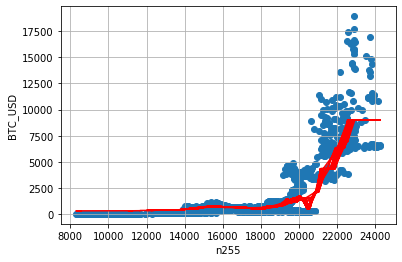

In [25]:
import lightgbm as lgb

X = n255_btc["close_n255"].to_frame()
Y = n255_btc["close_btc"].to_frame()
# 2012-01-04 <= train < 2018-01-04 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-04", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

# LightGBM parameters
params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}
# train
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.plot(X, gbm.predict(X, num_iteration=gbm.best_iteration), color="red")
plt.grid()

子供が線を引いた感じ

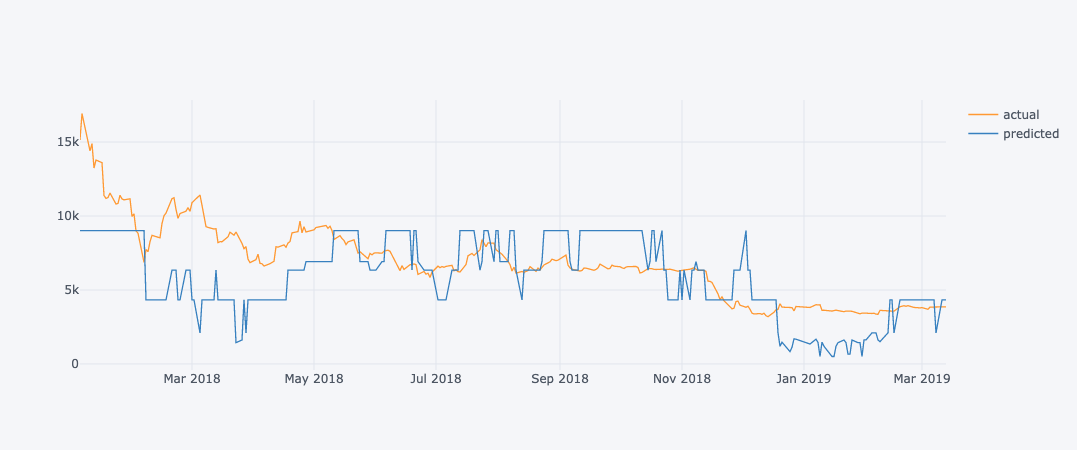

In [26]:
# 実際のBTC_USDと予測結果（2018-01-04から2019-03-13まで）
pd.DataFrame({
    "actual": test_y["close_btc"],
    "predicted": gbm.predict(test_x, num_iteration=gbm.best_iteration).reshape(1, -1)[0]
}).iplot()

# まとめ

- Bitcoinの価格と日経平均株価に関係はなさそう
- 後追いモデルはパット見よく見える
- １つの情報源からモデルを作るだけでも、勉強込みで時間かかる

# 気になって調べたこと

- 時系列データの線形補完のやりかた
    - 今回は嘘のデータを混ぜたくないので使わない
    - [pandasで欠損値NaNを前後の値から補間するinterpolate | note.nkmk.me](https://note.nkmk.me/python-pandas-interpolate/)

```python
df.interpolate('time')
```

- OHLCデータは`cufflinks`ってやつ使うと簡単に描写できる
    - Open、High、Low、Closeのあるデータ、主に金融データ
    - [jupyter notebook上で金融データの描画・取得・操作 - Qiita](https://qiita.com/u1and0/items/6bc0dbeed0e20dd89eda)

- OHLCデータのタイムスタンプ単位は`resample`使うと簡単に変更できる

``` python
df.resample('H').agg(how)
```